In [1]:
import pandas as pd
import geopandas as gpd
import seaborn as sns
from scipy import stats
from matplotlib import pyplot as plt
import matplotlib.colors as colors
import matplotlib as mpl
import matplotlib
import numpy as np

In [2]:
# sns.set_style('white')
sns.set_context("paper", font_scale = 1)



In [5]:
# dataset = pd.read_pickle('../../../geodata/results/01_master_building_dataset.pkl')
dataset = pd.read_pickle('../../geodata/results/01_master_building_dataset.pkl')


In [44]:
rename_col = {
       'Dac1' :'Roof', 
       'Fas2' :'Fassade',  
       'Geb12':'Building',  
       'Kue8' :'Artificial Grass',  
       'Nat3' :'Nature',  
       'Veg3' :'Roof', 
       'Ver6' :'Road Traffic', 
       'sky'  :'Sky', 
       'Abb7' :'Industrial', 
       'Abw14':'Waste Waster', 
       'Flu18':'Airfield',
       'Ueb5' :'Other', 
       'Gew1' :'WaterBody',  
       'Hel19':'Heliport', 
       'Keh15':'Waste Inceneration',  
       'Lan10':'Agriculture', 
       'Lan17':'Airport', 
       'Sak13':'Sacral',  
       'Sie9' :'Settlement', 
       'Ver11':'High-Performing Traffic',  
       'Was16':'Water Basin',  
}

In [10]:
from palettable import wesanderson

In [11]:
sns.set_theme()
# sns.set_style('white')
sns.set_context("paper", font_scale = 1)

plt.rc('font', family='serif')
plt.rc('xtick', labelsize='x-small')
plt.rc('ytick', labelsize='x-small')
plt.rcParams['svg.fonttype'] = 'none'

C:\Users\swietek\AppData\Local\Temp\ipykernel_43864\930735495.py:16: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.ecdfplot(data = dat.query('variable in @var_lst'),


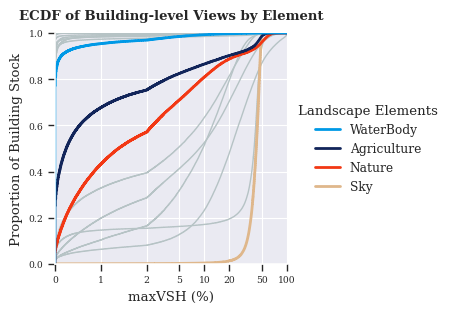

In [45]:
maxvsh_cols = dataset.columns[dataset.columns.str.contains('maxvsh')]
dat = dataset[maxvsh_cols.drop('maxvsh_Sie9')].sample(100000)
# dat = dat.replace(0,None)
dat.columns = dat.columns.str.replace('maxvsh_', '')
dat = dat.rename(columns = rename_col)
dat = dat.melt()

var_lst = ['Sky','Agriculture','WaterBody','Nature']#'Road Traffic','High-Performing Traffic',
f, ax = plt.subplots(figsize = (3,3))
for element in dat.variable.unique().tolist():
    sns.ecdfplot(data = dat.query('variable in @element'), 
            x = 'value', color = wesanderson.Zissou_5.mpl_colors[4],#'0.5', 
            legend = False, 
            # log_scale=(2,False),
            linewidth=1, ax = ax)
sns.ecdfplot(data = dat.query('variable in @var_lst'), 
            x = 'value', hue = 'variable',
            palette = wesanderson.Zissou_5.mpl_colors, legend = True, 
            # log_scale=(2,False),
            linewidth=2, ax = ax)

sns.move_legend(ax, "center left",frameon = False, title = 'Landscape Elements', bbox_to_anchor=(1,.5))

plt.xlim((0,101))
plt.xlabel('maxVSH (%)')
plt.ylabel('Proportion of Building Stock')
plt.xscale('symlog')

ax.tick_params(axis = 'both', which = 'major', bottom=True, left = True)

ax.set_xticks([0,1,2,5,10,20,50,100])
x_minor = matplotlib.ticker.LogLocator(base = 10.0, subs = np.arange(1.0, 10.0) * 0.1, numticks = 10)
ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
# ax.yaxis.get_ticklocs(minor=True)     # []

# ax.yaxis.grid(color='lightgrey', linestyle='dashed', lw = .5)
# ax.xaxis.grid(color='lightgrey', linestyle='dashed', lw = .5)

ax.spines[['left','bottom']].set_linewidth(1.1)
sns.despine(left=False,top=True,right = True, bottom=False)
ax.set_title('ECDF of Building-level Views by Element',loc = 'center', wrap = True,fontweight = 'bold', pad = 10)

# plt.savefig('../../../LUP_VisualCapital/figs/fig1_ch_maxvsh_ecdf.pdf',bbox_inches = 'tight', dpi = 300)
plt.savefig('../../figs/fig1_ch_maxvsh_ecdf.jpg',bbox_inches = 'tight', dpi = 300)


In [42]:
rename_col = {
    'sum_ShFer3':'Far Dist.',
    'sum_ShMit2':'Mid Dist.',
    'sum_ShNah1':'Near Dist.',
    'sum_ShSky':'Sky',
    'sum_ShUne4':'Infinite Dist.',
}
dat = dataset.rename(columns = rename_col)


In [31]:
pal = ["#A42820", "#5F5647", "#9B110E", "#3F5151", "#4E2A1E", "#550307", "#0C1707"]
pal[::-1]

['#0C1707', '#550307', '#4E2A1E', '#3F5151', '#9B110E', '#5F5647', '#A42820']

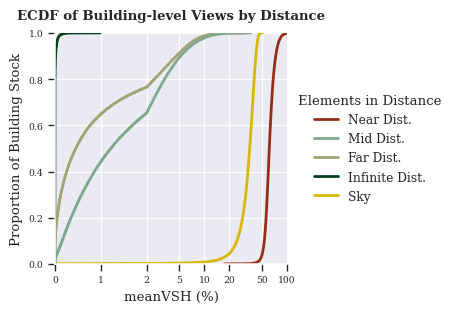

In [43]:
dat = dataset[['sum_ShFer3', 'sum_ShMit2', 'sum_ShNah1','sum_ShUne4', 'sum_ShSky']].sample(100000)
dat = dat.rename(columns = rename_col)

dat = dat.melt()

# var_lst = ['Sky','Agriculture','WaterBody','Nature']#'Road Traffic','High-Performing Traffic',
f, ax = plt.subplots(figsize = (3,3))
# for element in dat.variable.unique().tolist():
#     sns.ecdfplot(data = dat.query('variable in @element'), 
#             x = 'value', color = wesanderson.Zissou_5.mpl_colors[4],#'0.5', 
#             legend = False, 
#             # log_scale=(2,False),
#             linewidth=1, ax = ax)
sns.ecdfplot(data = dat,#.query('variable in @var_lst'), 
            x = 'value', hue = 'variable', hue_order = ['Near Dist.','Mid Dist.','Far Dist.','Infinite Dist.','Sky'],
            palette = ["#D8B70A", "#02401B", "#A2A475", "#81A88D", "#972D15"][::-1], legend = True, 
            # log_scale=(2,False),
            linewidth=2, ax = ax)

sns.move_legend(ax, "center left",frameon = False, title = 'Elements in Distance', bbox_to_anchor=(1,.5))

plt.xlim((0,101))
plt.xlabel('meanVSH (%)')
plt.ylabel('Proportion of Building Stock')
plt.xscale('symlog')

ax.tick_params(axis = 'both', which = 'major', bottom=True, left = True)

ax.set_xticks([0,1,2,5,10,20,50,100])
x_minor = matplotlib.ticker.LogLocator(base = 10.0, subs = np.arange(1.0, 10.0) * 0.1, numticks = 10)
ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
# ax.yaxis.get_ticklocs(minor=True)     # []

# ax.yaxis.grid(color='lightgrey', linestyle='dashed', lw = .5)
# ax.xaxis.grid(color='lightgrey', linestyle='dashed', lw = .5)

ax.spines[['left','bottom']].set_linewidth(1.1)
sns.despine(left=False,top=True,right = True, bottom=False)
ax.set_title('ECDF of Building-level Views by Distance',loc = 'center', wrap = True,fontweight = 'bold', pad = 10)

# plt.savefig('../../../LUP_VisualCapital/figs/fig1_ch_maxvsh_ecdf.pdf',bbox_inches = 'tight', dpi = 300)
plt.savefig('../../figs/fig1_ch_meanVSH_distance_ecdf.jpg',bbox_inches = 'tight', dpi = 300)


Text(0.5, 1.0, 'ECDF of Building-level Views by Sentiment')

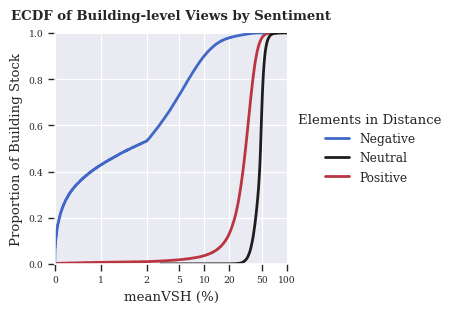

In [48]:
rename_col = {
    'snt_0':'Neutral',
    'snt_Neg':'Negative',
    'snt_Pos':'Positive',

}

dat = dataset[['snt_0', 'snt_Neg', 'snt_Pos']].sample(100000)
dat = dat.rename(columns = rename_col)

dat = dat.melt()

# var_lst = ['Sky','Agriculture','WaterBody','Nature']#'Road Traffic','High-Performing Traffic',
f, ax = plt.subplots(figsize = (3,3))
# for element in dat.variable.unique().tolist():
#     sns.ecdfplot(data = dat.query('variable in @element'), 
#             x = 'value', color = wesanderson.Zissou_5.mpl_colors[4],#'0.5', 
#             legend = False, 
#             # log_scale=(2,False),
#             linewidth=1, ax = ax)
sns.ecdfplot(data = dat,#.query('variable in @var_lst'), 
            x = 'value', hue = 'variable', hue_order = ['Negative','Neutral','Positive'],
            palette = 'icefire', legend = True, 
            # log_scale=(2,False),
            linewidth=2, ax = ax)

sns.move_legend(ax, "center left",frameon = False, title = 'Elements in Distance', bbox_to_anchor=(1,.5))

plt.xlim((0,101))
plt.xlabel('meanVSH (%)')
plt.ylabel('Proportion of Building Stock')
plt.xscale('symlog')

ax.tick_params(axis = 'both', which = 'major', bottom=True, left = True)

ax.set_xticks([0,1,2,5,10,20,50,100])
x_minor = matplotlib.ticker.LogLocator(base = 10.0, subs = np.arange(1.0, 10.0) * 0.1, numticks = 10)
ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
# ax.yaxis.get_ticklocs(minor=True)     # []

# ax.yaxis.grid(color='lightgrey', linestyle='dashed', lw = .5)
# ax.xaxis.grid(color='lightgrey', linestyle='dashed', lw = .5)

ax.spines[['left','bottom']].set_linewidth(1.1)
sns.despine(left=False,top=True,right = True, bottom=False)
ax.set_title('ECDF of Building-level Views by Sentiment',loc = 'center', wrap = True,fontweight = 'bold', pad = 10)



/var/folders/7b/rl6lkdns1dbfv_n3wwwmq8580000gn/T/ipykernel_42502/4243601215.py:14: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  ax.figure.colorbar(plt.cm.ScalarMappable(cmap="RdBu", norm=norm),
/var/folders/7b/rl6lkdns1dbfv_n3wwwmq8580000gn/T/ipykernel_42502/4243601215.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ordr_lst, ha = 'left')


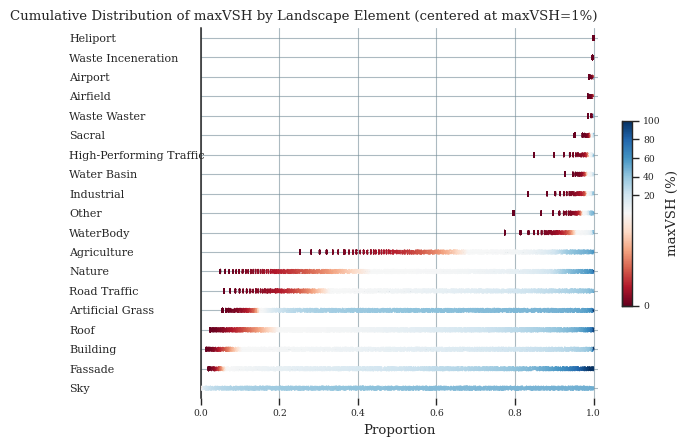

In [213]:
dat = dataset[maxvsh_cols.drop('maxvsh_Sie9')].sample(100000)
dat.columns = dat.columns.str.replace('maxvsh_', '')
dat = dat.rename(columns = rename_col)
dat = dat.melt()
dat['pct'] = dat.groupby('variable').transform(lambda x: x.rank(pct = True, method = 'max'))
ordr_lst = dat.groupby('variable')['value'].apply(lambda x: stats.percentileofscore(x,.5)).sort_values(ascending = False).index.tolist()
norm = mpl.colors.TwoSlopeNorm(vmin=0, vmax=100, vcenter=1)

ax = sns.stripplot(data = dat.sample(100000), 
              y = 'variable', hue = 'value', x = 'pct', palette = 'RdBu', 
              size = 1, order = ordr_lst, hue_norm=norm)

ax.get_legend().remove()
ax.figure.colorbar(plt.cm.ScalarMappable(cmap="RdBu", norm=norm), 
                   orientation='vertical', label = 'maxVSH (%)', shrink = 0.5)

sns.despine()
ax.set_xlabel('Proportion')
ax.set_ylabel('')
ax.set_yticklabels(ordr_lst, ha = 'left')
ax.yaxis.set_tick_params(pad=90,            # Pad tick labels so they don't go over y-axis
                         labelsize=8,       # Set label size
                         bottom=False)       # Set no ticks on bottom/left

ax.set_title('Cumulative Distribution of maxVSH by Landscape Element (centered at maxVSH=1%)',loc = 'right', wrap = True)#,fontweight = 'bold', pad = 0)
ax.spines[['top','right','bottom']].set_visible(False)
ax.spines['left'].set_linewidth(1.1)
# We do want ticks on the bottom x-axis only
ax.xaxis.set_ticks_position('bottom')
ax.set_xlim(0, 1.01)
# Reformat x-axis tick labels
ax.grid(which="major", axis='both', color='#758D99', alpha=0.6, zorder=1)
# plt.savefig('../../figs/fig1_ch_maxvsh_coloredecdf.pdf')

C:\Users\swietek\AppData\Local\Temp\ipykernel_15008\1019434519.py:14: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  ax.figure.colorbar(plt.cm.ScalarMappable(cmap="RdBu", norm=norm),
C:\Users\swietek\AppData\Local\Temp\ipykernel_15008\1019434519.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ordr_lst, ha = 'left')


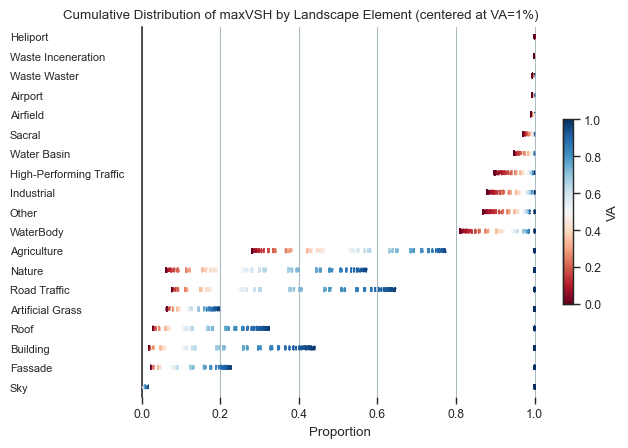

In [279]:
vaccess_cols = dataset.columns[dataset.columns.str.contains('vwa')]
dat = dataset[vaccess_cols.drop('vwa_Sie9')].sample(100000)
dat.columns = dat.columns.str.replace('vwa_', '')
dat = dat.rename(columns = rename_col)
dat = dat.melt()
dat['pct'] = dat.groupby('variable').transform(lambda x: x.rank(pct = True, method = 'max'))
ordr_lst = dat.groupby('variable')['value'].apply(lambda x: stats.percentileofscore(x,.5)).sort_values(ascending = False).index.tolist()
norm = mpl.colors.TwoSlopeNorm(vmin=0, vmax=1, vcenter=.5)

ax = sns.stripplot(data = dat.sample(100000), 
              y = 'variable', hue = 'value', x = 'pct', palette = 'RdBu', 
              size = 1, order = ordr_lst, hue_norm=norm)
ax.get_legend().remove()
ax.figure.colorbar(plt.cm.ScalarMappable(cmap="RdBu", norm=norm), 
                   orientation='vertical', label = 'VA', shrink = 0.5)

sns.despine()
ax.set_xlabel('Proportion')
ax.set_ylabel('')
ax.set_yticklabels(ordr_lst, ha = 'left')
ax.yaxis.set_tick_params(pad=90,            # Pad tick labels so they don't go over y-axis
                         labelsize=8,       # Set label size
                         bottom=False)       # Set no ticks on bottom/left

ax.set_title('Cumulative Distribution of maxVSH by Landscape Element (centered at VA=1%)',loc = 'right', wrap = True)# fontweight = 'bold')
ax.spines[['top','right','bottom']].set_visible(False)
ax.spines['left'].set_linewidth(1.1)
# We do want ticks on the bottom x-axis only
ax.xaxis.set_ticks_position('bottom')
ax.set_xlim(0, 1.01)
# Reformat x-axis tick labels
ax.grid(which="major", axis='x', color='#758D99', alpha=0.6, zorder=1)